<a href="https://colab.research.google.com/github/profRCC/Softex/blob/master/RedesNeurais_CancerMama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificação com Redes Neurais**

* Aprendizado supervisionado
* Mapeamento de um vetor de atributos para um atributo de classe
* Seja $x_i$ um conjunto de $n$ instâncias pertencentes a uma classe $c$ 
  * $x_i$ tem dimensão $d$
  * existem $m$ classes, $c \in {c_1,...,c_m}$
* Aprendizagem é identificar a função $f$ tal que:
  * $f([x_{i1},x_{i2},...,x_{id}]) = c$
* O aprendizado em uma RNA consiste no ajuste dos pesos
  * a minimização do erro é a função objetivo

## **Classificação de Câncer de Mama**

* Dataset com atributos de nódulos identificados em imagens digitais de exames de mama. 
* Dados descrevem características do núcleo celular presentes na imagem e o diagnóstico associado (maligno ou benigno).
* [Breast Cancer Wiscosing Data Set](https://https//www.kaggle.com/uciml/breast-cancer-wisconsin-data)


**Montando ambiente no Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## 1. Importar bibliotecas necessárias

In [ ]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

## 2. Lendo dados

In [ ]:
# lendo csv e armazenando em um dataframe
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Softex/Semana3/datasets/cancer/breast_cancer.csv')
dados.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 3. Limpeza e organização dos dados

In [ ]:
#verificar se existem valores NAN, ? ou dados faltantes
dados = dados.dropna()

In [ ]:
#excluir colunas irrelevantes
dados = dados.drop(columns=['id'])
dados.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#trocando o tipo do atributo diagnostico por um tipo numerico
dados['diagnosis'] = dados['diagnosis'].replace(['M','B'],[1,0])
dados.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 4. Re-escala dos dados

### Re-escala usando máximo e mínimo

In [ ]:
dados = (dados - dados.min())/(dados.max()-dados.min())

## 5. Organizando dados para modelagem

### Dividir os dados em atributos descritores e atributo de classe (target)

In [ ]:
#dividindo dados em atributos descritores e atributo de classe
X = dados.iloc[:,1:]
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [ ]:
y = dados.diagnosis
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: diagnosis, dtype: float64

### Dividir os dados em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

* Divide a matriz em subconjuntos aleatórios de treino e teste
* test_size: tamanho do subconjunto de teste (em percentual)
* random_state: define a semente para a aleatoriedade (se não definido, semente aleatória)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)#random_state=42

In [ ]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
60,0.150930,0.174839,0.143459,0.071432,0.548614,0.187811,0.025398,0.064115,0.850000,0.413648,0.146406,0.238861,0.120388,0.051958,0.197199,0.065626,0.019356,0.155200,0.477683,0.174751,0.109925,0.144723,0.096867,0.045075,0.371987,0.069244,0.017316,0.088625,0.392667,0.165027
21,0.119409,0.092323,0.114367,0.055313,0.449309,0.139685,0.069260,0.103181,0.381313,0.402064,0.060040,0.136271,0.054281,0.016619,0.268314,0.090636,0.050126,0.269180,0.174312,0.071625,0.081821,0.097015,0.073310,0.031877,0.404345,0.084903,0.070823,0.213986,0.174453,0.148826
490,0.249373,0.430504,0.237648,0.137010,0.264422,0.100055,0.040159,0.062674,0.244444,0.206403,0.040703,0.172118,0.038637,0.020990,0.115002,0.073587,0.023763,0.086210,0.115354,0.051967,0.221985,0.532249,0.210817,0.107575,0.359440,0.148548,0.098243,0.217698,0.302582,0.177030
33,0.581618,0.566791,0.581231,0.432025,0.373567,0.467824,0.388238,0.377386,0.400505,0.266428,0.160891,0.054367,0.130566,0.114621,0.112248,0.232283,0.088308,0.182667,0.106208,0.103686,0.577019,0.503198,0.552767,0.400069,0.526514,0.612888,0.486502,0.613402,0.415336,0.375574
531,0.221922,0.348664,0.217124,0.115673,0.442087,0.230507,0.098407,0.107207,0.403535,0.308551,0.034474,0.113662,0.029967,0.015947,0.120271,0.112792,0.046465,0.100360,0.092981,0.061364,0.192814,0.447495,0.182230,0.089805,0.553589,0.261092,0.220288,0.279038,0.323477,0.226026


In [ ]:
y_train.head()

60     0.0
21     0.0
490    0.0
33     1.0
531    0.0
Name: diagnosis, dtype: float64

## 5. Definindo algoritmo de aprendizado

Rede Neural Multi-Layer Perceptron (MLP)

Parâmetros da MLP:
* Número de neurônios e camadas - hidden_layer_sizes
  * tupla com a arquitetura
  * ex: (100,10) - duas camadas escondidas com 100 e 10 neurônios respectivamente
  * ex: (100,50,10)
* Função de ativação - activation
  * função de ativação das camadas escondidas
  * identidade - identity
  * sigmóide logística - logistic
  * tangente hiperbólica - tanh
  * função de unidade linear retificada - relu (max(0,x))
* Treinamento - solver
  * forma de otimizar os pesos da rede
  * gradiente estocástico  proposto por Kingma, Diederik, and Jimmy Ba - adam
  * descida do gradiente estocástico - sgd
  * familia dos métodos quasi-Newton - lbfgs
* Taxa de aprendizado - learning_rate
  * taxa constant - constant
  * decrescente - invscaling
  * adaptativa - adaptive
* Número máximo de iterações - max_iter
  * número de épocas de treinamento

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
#definindo modelo
classificador = MLPClassifier(hidden_layer_sizes=(100),activation='logistic',max_iter=1000)

In [ ]:
#treinando modelo
classificador.fit(X_train,y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
#realizando classificação
classificacao = classificador.predict(X_test)
classificacao

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.])

## 6. Avaliação do classificador

Acurácia
* taxa de acertos do classificador

In [ ]:
#calculando acurácia
from sklearn.metrics import accuracy_score

In [ ]:
acuracia = accuracy_score(y_test,classificacao)
round(acuracia,3)

0.965

Precisão
* taxa de instâncias classificadas como positivas que são realmente positivas

In [ ]:
#calculando precisão
from sklearn.metrics import precision_score

In [ ]:
precisao = precision_score(y_test,classificacao)
round(precisao,3)

1.0

Recall
* taxa de instâncias positivas classificadas corretamente

In [ ]:
#calculando recall (revocação)
from sklearn.metrics import recall_score

In [ ]:
recall = recall_score(y_test,classificacao)
round(recall,3)

0.956

F1-score
* balanço entre precisão e recall

In [ ]:
#calculando f1-score
from sklearn.metrics import f1_score

In [ ]:
f1 = f1_score(y_test,classificacao)
round(f1,3)

0.977

### Curva ROC
* Representação gráfica do desempenho de um classificador binário
* Razão entre a taxa de positivos verdadeiros (TPR) e positivos falsos (FPR)
* Interpretação
  * quanto maior tpr, melhor
  * quanto menor fpr, melhor

In [ ]:
#plotando curva roc
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, _ = roc_curve(y_test,classificacao)

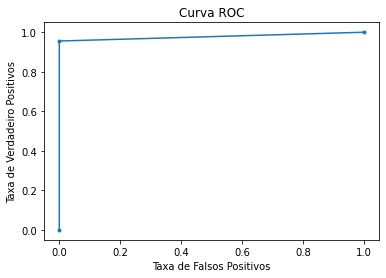

In [ ]:
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

## Área sob a curva (*Area under the curve - AUC)*
* Área sob a curva ROC
* Interpretação numérica da curva ROC

In [ ]:
#calculando area sob a curva ROC
from sklearn.metrics import roc_auc_score

In [ ]:
auc = roc_auc_score(y_test,classificacao)
round(auc,3)

0.978

## Validação cruzada

In [ ]:
# avaliando modelo com cross validation
from sklearn.model_selection import cross_val_score

In [ ]:
#define modelo
classificador = MLPClassifier(hidden_layer_sizes=(100),activation='logistic',max_iter=1000)

In [ ]:
#calculando os scores
scores = cross_val_score(classificador,X,y,cv=10)
scores

array([1.        , 0.96491228, 0.98245614, 0.94736842, 1.        ,
       0.98245614, 0.94736842, 1.        , 1.        , 0.98214286])

In [ ]:
round(scores.mean(),3),round(scores.std(),3)

(0.981, 0.02)

## 7. Comparando MLP com Árvore de Decisão e Random Forest

### Validação Cruzada

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#criando árvore
arvore = DecisionTreeClassifier()

#calculando os scores
scores_arvore = cross_val_score(arvore,X,y,cv=10)

In [ ]:
#criando random forest
floresta = RandomForestClassifier()

#calculando os scores
scores_floresta = cross_val_score(floresta,X,y,cv=10)


In [ ]:
#criando rede neural
mlp = MLPClassifier(hidden_layer_sizes=(100),activation='logistic',max_iter=1000)

#calculando os scores
scores_mlp = cross_val_score(mlp,X,y,cv=10)

In [ ]:
print('Árvore de Decisão: ', round(scores_arvore.mean(),3),round(scores_arvore.std(),3))
print('Random Forest: ', round(scores.mean(),3),round(scores.std(),3))
print('MLP:', round(scores_mlp.mean(),3),round(scores_mlp.std(),3))

Árvore de Decisão:  0.916 0.039
Random Forest:  0.981 0.02
MLP: 0.979 0.019


## 8. Otimização de Parâmetros

## Otimizando parâmetros
* Problema 
  * qual a melhor configuração de parâmetros para o modelo
* Otimização
  * escolher o melhor elemento de um conjunto
  * o significado de melhor é dado por uma função objetivo
    * taxa de erro

  <img src=https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/ac3f2f5a-9199-4bb7-8ce6-47e4dc307a0e.png width=500>

* Solução "mais simples"
  * tente todas as possibilidades
  * alto custo computacional
* Solução heurística
  * otimização estocástica
  * busca no espaço de soluções
* Random search
  * busca aleatória
  * sorteia alguns pontos do espaço e escolhe o melhor

  <img src= https://maelfabien.github.io/assets/images/expl4_4.jpg width=500>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_grid = [
              {
                  'hidden_layer_sizes': [(10),(50),(100),(50,10),(100,50)],
                  'activation': ['identity', 'logistic', 'tanh', 'relu'],
                  'solver': ['lbfgs', 'sgd', 'adam'],
                  'max_iter': [500,1000,2000]
              }
              
]

In [ ]:
mlp = RandomizedSearchCV(MLPClassifier(),param_grid,cv=5,scoring='accuracy')

In [ ]:
mlp.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_fun=15000, max_iter=200,
                                           momentum=0.9, n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           random...
                                           verbose=False, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions=[{

In [ ]:
print(mlp.best_params_)

{'solver': 'adam', 'max_iter': 500, 'hidden_layer_sizes': 50, 'activation': 'logistic'}


In [ ]:
print(round(mlp.best_score_,3))

0.977


* Grid search
  * monta um espaço de soluções reduzido como um reticulado
  * testa todas as soluções, guardando a melhor

  <img src=https://maelfabien.github.io/assets/images/expl4_1.jpg width=500>

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
mlp = GridSearchCV(MLPClassifier(),param_grid,cv=5,scoring='accuracy')

In [ ]:
mlp.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571:

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=1000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_stat...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'activation': [

In [ ]:
print(mlp.best_params_)

{'activation': 'identity', 'hidden_layer_sizes': 10, 'max_iter': 2000, 'solver': 'adam'}


In [ ]:
print(mlp.best_score_)

0.9807017543859651


In [ ]:
mlp.cv_results_

{'mean_fit_time': array([0.10085878, 0.37293754, 0.39574351, 0.13594613, 0.69761062,
        0.56198049, 0.13781214, 0.68671989, 0.66646929, 0.2320087 ,
        0.7469069 , 0.85803967, 0.37283807, 1.333077  , 0.87133412,
        0.4855773 , 1.31437697, 0.84062619, 0.30150728, 0.96937237,
        0.93753738, 0.26690264, 1.64909024, 0.92895794, 0.27882524,
        1.64822073, 0.92602906, 0.29086843, 0.92397113, 0.6331284 ,
        0.45072312, 1.25837474, 0.56350913, 0.42188411, 1.27538438,
        0.60727224, 0.75724292, 1.51951556, 0.60602579, 0.88707767,
        2.02117114, 0.62106037, 0.97087469, 2.06210942, 0.60815554,
        0.0753191 , 0.13420448, 0.50418062, 0.07081823, 0.26108141,
        0.96388631, 0.04194746, 0.39289618, 1.00863819, 0.2178802 ,
        0.93975182, 1.28080096, 0.20079527, 1.87363224, 1.91458793,
        0.23150311, 4.61284986, 1.70033846, 0.48186321, 1.79894366,
        1.89381175, 0.38977385, 3.54224715, 2.39680157, 0.43762217,
        7.06554484, 2.30587707,